# Homework 2:

#### Deadline: Wednesday 12 June 2024 (by 19h00)

#### Credits: 20 points

## Name: Males-Araujo Yorlan

## Problem statement: shock-cloud interaction

Shock waves are flow discontinuities that arise in supersonic gases when the local flow speed exceeds the sound speed of the gas. When shocks interact with gas clouds, they can accelerate them and disrupt them.

Here, we numerically study one of such interactions where a shock wave propagates across a 2D computational domain (along the Y-axis from the bottom to the top), interacting with a cylindrical cloud in slab geometry. In the simulation, the cloud gas is tracked with a pigment (tracer).

The flow is adiabatic (the polytropic index is $\gamma=5/3$), the gas is ionised (the mean particle mass is $\mu = 0.6$), and the gas is also magnetised (the magnetic field is initially perpendicular to the flow, so it is oriented along the X-axis).

The shock-cloud numerical simulation produces $61$ VTK files stored in:

- the **MHD-shock-cloud** folder: 

https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/MHD-shock-cloud.zip

jointly with:

- a **units.out** file that contains the CGS normalisation values.
- a **vtk.out** file whose second column contains the times in code units.
- a **grid.out** file that contains information on the grid structure.

You can use VisIt to inspect the data.

## 1. (5 points) 2D data I/O and visualisation

Create a set of Python functions that:

### (a) opens the **units.out** file, stores the normalisation values for length, velocity, density, pressure, magnetic field and time into callable objects, and then returns them.

**Note:**

The normalisation values for thermal pressure $\left(p_0=\rho_0\,v_0^2\right)$, magnetic field $\left(B_0=\sqrt{4\,\pi\,\rho_0\,v_0^2}\right)$, and time $\left(t_0=\frac{L_0}{v_0}\right)$ can be derived from the length, velocity, and density values.


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function:
def units(units_file):
    """
    Stores the normalisation values for length, velocity, density, pressure,
    magnetic field and time into callable objects, and then returns them.
    Inputs: units_file -> variable storing the units file
            time_file -> variable storing the time data
    Outputs:
    Author: MAY
    """
    # Read the cgs units file:
    df_units = pd.read_csv(units_file)

    # Get the units into python objects:
    rho_0 = np.array(df_units.loc[df_units["variable"] == "rho_0"]["normalisation"])
    v_0 = np.array(df_units.loc[df_units["variable"] == "v_0"]["normalisation"])
    l_0 = np.array(df_units.loc[df_units["variable"] == "L_0"]["normalisation"])
    
    # And derive the others:
    # Time:
    t_0 = l_0/v_0

    # Pressure:
    p_0 = rho_0*v_0**2

    # Magnetic field:
    b_0 = v_0*np.sqrt(4*np.pi*rho_0)

    return rho_0, v_0, l_0, t_0, p_0, b_0 

In [3]:
# Provide the paths

units_file = "./data/MHD-shock-cloud/units.out"
#time_file = "./data/MHD-shock-cloud/vtk.out"

# And call the function:
den_units, vel_units, len_units, time_units, press_units, magnet_units = units(units_file) 

### (b) opens the **VTK** file # 45, reads the data arrays, and returns the 2D, CGS-normalised arrays for:

- density (rho)
- thermal pressure (prs)
- pigment (tr1)
- velocity_x (vx1)
- velocity_y (vx2)
- magnetic_field_x (Bx1)
- magnetic_field_y (Bx2)

**Notes:**

- The pigment tr1 does not need to be normalised as it is just a dimensionless colour. Initially, the pigment/tracer tr1 is 1 for cloud gas and 0 everywhere else, so it effectively tracks the cloud gas.

- Use the normalisation values returned by the function from part **(a)** to convert fron code units to CGS units.

In [4]:
# Importing the libraries:
import pyvista as pv

In [5]:
# Function:
def normalised_arrays(vtk_file):
    """
    Reads the data arrays, and returns 2D CGS-normalised arrays.
    Inputs: vtk_file -> variable storing the vtk file
    Outputs: rho_2d -> 2D density array
             prs_2d -> 2D pressure array
             tr1_2d -> 2D trace array
             vx1_2d -> 2D velocity array along x
             vx2_2d -> 2D velocity array along y
             bx1_2d -> 2D magnetic field array along x
             bx2_2d -> 2D magnetic field array along x
    Author: MAY
    """
    # Obtain the 2D data in code units:
    mesh = pv.read(vtk_file)

    # Get data arrays in code units:
    rho = pv.get_array(mesh, "rho", preference = 'cell')
    prs = pv.get_array(mesh, "prs", preference = 'cell')
    tr1 = pv.get_array(mesh, "tr1", preference = 'cell')
    vx1 = pv.get_array(mesh, "vx1", preference = 'cell')
    vx2 = pv.get_array(mesh, "vx2", preference = 'cell')
    bx1 = pv.get_array(mesh, "Bx1", preference = 'cell')
    bx2 = pv.get_array(mesh, "Bx2", preference = 'cell')

    # Normalise them:
    rho_cgs = rho*den_units
    prs_cgs = prs*press_units
    vx1_cgs = vx1*vel_units
    vx2_cgs = vx2*vel_units
    bx1_cgs = bx1*magnet_units
    bx2_cgs = bx2*magnet_units

    # And reshape them:

    rho_2d = rho_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    prs_2d = prs_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    tr1_2d = tr1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx1_2d = vx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx2_2d = vx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    bx1_2d = bx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    bx2_2d = bx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

    return rho_2d, prs_2d, tr1_2d, vx1_2d, vx2_2d, bx1_2d, bx2_2d, mesh

In [6]:
# Path to vtk #45
vtk_45 = "./data/MHD-shock-cloud/data.0044.vtk"

# Call the function
rho_2d, prs_2d, tr1_2d, vx1_2d, vx2_2d, bx1_2d, bx2_2d, mesh = normalised_arrays(vtk_45)

### (c) reads the 2D arrays returned by the function above, interpolates them into a CGS-normalised meshgrid created with the mesh information stored in the VTK files, and exports 4 figures containing maps of:

- density
- thermal pressure
- velocity
- magnetic field

**Note:**

Choose different perceptually-uniform colour schemes for each of the above quantities.

In [7]:
# Import libraries
import os
from skimage.transform import resize

In [8]:
# Function
def maps(rho_2d, prs_2d, tr1_2d, vx1_2d, vx2_2d,
         bx1_2d, bx2_2d, mesh, general_title, boolean_show):
    """
    Reads the 2D arrays returned by the function above,
    interpolates them into a CGS-normalised meshgrid
    created with the mesh information stored in the VTK files,
    and exports 4 figures containing maps. 
    Inputs: The outputs of the previous function.
    Outputs: Four maps: density, thermal pressure,
                        velocity and magnetic field.
    Author: MAY.
    """
    # Create the normalized grids:
    x = len_units*np.linspace(mesh.bounds[0], mesh.bounds[1], (mesh.dimensions[0] - 1))
    y = len_units*np.linspace(mesh.bounds[2], mesh.bounds[3], (mesh.dimensions[0] - 1))

    # For scalar fields:
    x_2d, y_2d = np.meshgrid(x, y)

    # For vector fields (they will resized accordingly):
    x_2 = len_units*np.linspace(mesh.bounds[0], mesh.bounds[1], (mesh.dimensions[0] - 1)//8)
    y_2 = len_units*np.linspace(mesh.bounds[2], mesh.bounds[3], (mesh.dimensions[0] - 1)//8)

    x_2d_vect, y_2d_vect = np.meshgrid(x_2, y_2)
    
    # Resizing the velocity and magnetic field:
    v1_res = resize(vx1_2d, (32,32), preserve_range = True)
    v2_res = resize(vx2_2d, (32,32), preserve_range = True)
    
    b1_res = resize(bx1_2d, (32,32), preserve_range = True)
    b2_res = resize(bx2_2d, (32,32), preserve_range = True)

    # And the magnitude of each
    
    vel_mag_2d = np.sqrt(v1_res**2+v2_res**2)
    magnet_mag_2d = np.sqrt(b1_res**2+b2_res**2)
    
    # MAPS
    # Density map
    fig, axs = plt.subplots(2, 2, figsize = (10/1.3,8/1.3))
    fig.suptitle(f'{general_title}')
    
    dens = axs[0,0].pcolor(x_2d, y_2d, np.log10(rho_2d), cmap = "magma_r", vmin = -24, vmax = -22)
    fig.colorbar(dens, label = r"$Density\, magnitude\, [g/cm^3]$")
    axs[0,0].set(title = 'Density', xlabel = r"$x-axis\, [cm]$", ylabel = r"$y-axis\, [cm]$")

    # Pressure map

    pres = axs[0,1].pcolor(x_2d, y_2d, np.log10(prs_2d), cmap = "inferno", vmin = -10, vmax = -7.5)
    fig.colorbar(pres, label = r"$Thermal\, pressure\, magnitude\, [g/s^2 cm]$")
    axs[0,1].set(title = 'Pressure', xlabel = r"$x-axis\, [cm]$", ylabel = r"$y-axis\, [cm]$")

    # Velocity map

    velo = axs[1,0].pcolor(x_2d_vect, y_2d_vect, vel_mag_2d, cmap='magma_r', vmin = 0, vmax = 1.1e8)
    axs[1,0].quiver(x_2d_vect, y_2d_vect, v1_res, v2_res, vel_mag_2d, cmap = "Greys_r", clim=(0, 1.1e8))
    fig.colorbar(velo, label = r"$Velocity\, magnitude\, [cm/s]$")
    axs[1,0].set(title = 'Velocity field', xlabel = r"$x-axis\, [cm]$", ylabel = r"$y-axis\, [cm]$",
                 xlim=(x_2[0], x_2[-1]), ylim = (y_2[0], y_2[-1]))

    # Magnetic map
    
    magn = axs[1,1].pcolor(x_2d_vect, y_2d_vect, magnet_mag_2d, cmap='cividis_r', vmin = 0, vmax = 8e-4)
    axs[1,1].quiver(x_2d_vect, y_2d_vect, b1_res, b2_res, magnet_mag_2d, cmap = "Greys_r", clim=(0,8e-4))
    fig.colorbar(magn, label = r"$Magnetic field\, magnitude\, [G]$")
    axs[1,1].set(title = 'Magnetic field', xlabel = r"$x-axis\, [cm]$", ylabel = r"$y-axis\, [cm]$",
                 xlim=(x_2[0], x_2[-1]), ylim = (y_2[0], y_2[-1]))
    
    plt.tight_layout()
    if boolean_show:
        plt.show()
    plt.close()

    return fig, x_2d, y_2d

In [9]:
# We call the function
fig1, x_2d_grid, y_2d_grid = maps(rho_2d, prs_2d, tr1_2d, vx1_2d,
                                  vx2_2d, bx1_2d, bx2_2d, mesh, "VTK file #45", False)

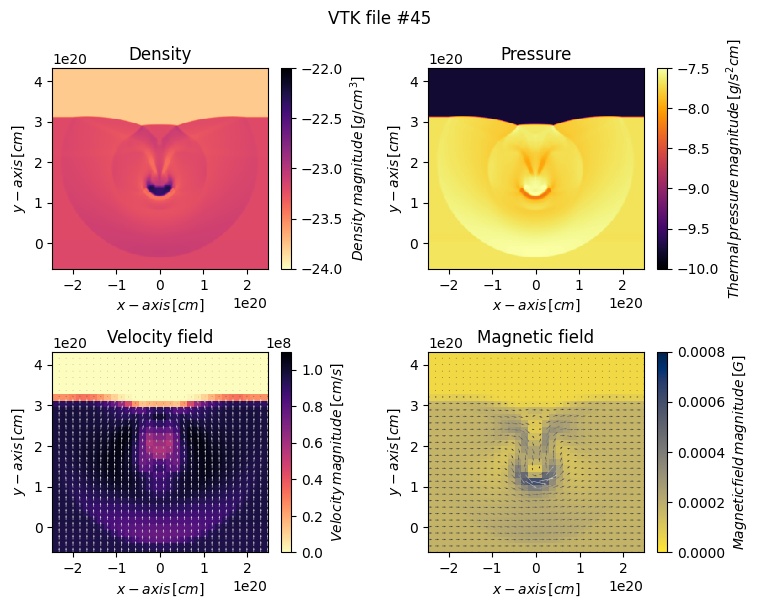

In [10]:
# Let's take a look:
fig1

They seem very good. 

## 2. (5 points) Image analysis: isolating features and derivatives

For the same VTK file (# 45), create a set of Python functions that:

### (a) Isolate the cloud gas based on the following algorithm:

- Read the 2D density (rho) and pigment (tr1) arrays.

- Isolate the densities of grid cells that contain only pigment values tr1 > 0.05 (you can use conditionals to get the cell indices first).


In [11]:
# Function
def isolation(rho_2d, tr1_2d, title, boolean1, boolean2):
    """
    Isolates features in the density data by using 
    the pigment arrays.
    Input: rho_2d -> 2D density array
           tr1_2d -> 2D trace array
    Output: density_isolated -> the result
    Author: MAY
    """
    # Without having to find the coefficients:
    density_isolated = np.where(tr1_2d>0.05, rho_2d, 0)

    # If needed, the plot:

    # Not isolated
    fig4, ax = plt.subplots()
    dens = ax.pcolor(x_2d_grid, y_2d_grid, np.log10(rho_2d), cmap = "magma_r", vmin = -24, vmax = -22)
    fig4.colorbar(dens, label = r"$Density\, magnitude\, [g/cm^3]$")
    ax.set(title = 'Density', xlabel = r"$x-axis\, [cm]$", ylabel = r"$y-axis\, [cm]$")
    if boolean1:
        plt.show()
    plt.close()
    
    # Isolated
    fig5, ax = plt.subplots()
    dens = ax.pcolor(x_2d_grid, y_2d_grid, density_isolated, cmap = "magma_r", vmin=0, vmax = 5.5e-23)
    fig5.colorbar(dens, label = r"$Density\, magnitude\, [g/cm^3]$")
    ax.set(title = f'{title}', xlabel = r"$x-axis\, [cm]$", ylabel = r"$y-axis\, [cm]$")
    if boolean2:
        plt.show()
    plt.close()
    
    return fig4, fig5, density_isolated

### (b) Make a map of the resulting density of cloud gas only.

In [12]:
# Call the function:
fig4, fig5, density_trace = isolation(rho_2d, tr1_2d, 'VTK file #45: Isolated cloud density', False, False)

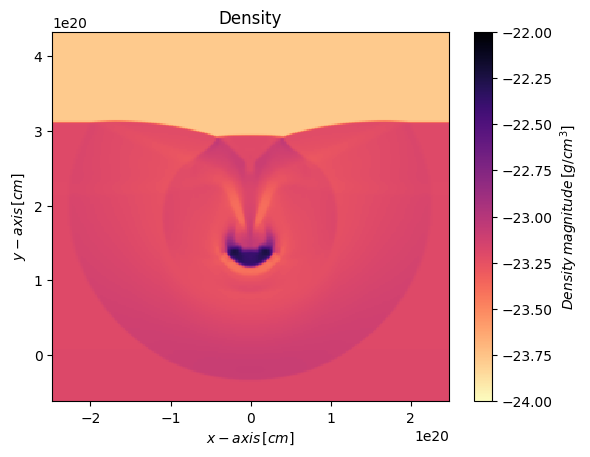

In [13]:
# Lets take a look at both:
fig4

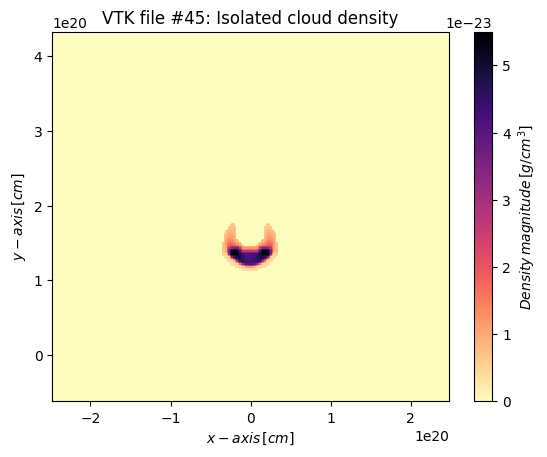

In [14]:
# The isolated part
fig5

The cloud has been isolated using the pigment.

### (c) Isolate candidate shocked cells based on the following methods:


#### - **Method 1:** Read the 2D velocity vector field. Compute the divergence of the velocity field and isolate the cells where there are convergent flows (i.e. where $\vec\nabla\cdot \vec v <0$). Cells with convergent flows are candidate shocked cells.

In [15]:
# Function 
def divergence(vx1_2d, vx2_2d, boolean):
    """
    It computes the divergence of the velocity field
    and isolates the cells where there are convergent flows. 
    Inputs: vx1_2d -> velocity in the x-component
            vx2_2d -> velocity in the x-component
            boolean -> True or False to show the graphs or not
    Outputs: div -> total divergence
             negative_div -> isolated negative divergence
    Author: MAY
    """
    # Get them to code units
    vx1_code = vx1_2d/vel_units
    vx2_code = vx2_2d/vel_units
    
    # Spacing = 1 seems to work best. 

    # Compute the derivatives of the data
    grad_x = np.array(np.gradient(vx1_code, axis=1))
    grad_y = np.array(np.gradient(vx2_code, axis=0))

    # And get the divergence in code units
    div = grad_x + grad_y

    # Isolate the 'negative' part
    negative_div = np.where(div<-0.1, div, np.nan)

    # Plotting if required:
    if boolean:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
        fig.suptitle('VTK file # 45: Divergence of the velocity field')
        
        total = ax1.pcolor(x_2d_grid, y_2d_grid, div, cmap="magma_r")
        ax1.set_title(r"$Total\, divergence$")
        ax1.set_xlabel(r"$x-axis\, [cm]$")
        ax1.set_ylabel(r"$y-axis\, [cm]$")
        cb1 = plt.colorbar(total)
        cb1.set_label(r"$Divergence\,magnitude$")
        
        negative = ax2.pcolor(x_2d_grid, y_2d_grid, negative_div, cmap="magma_r")
        ax2.set_title(r"$Isolated\,negative\,divergence$")
        ax2.set_xlabel(r"$x-axis\, [cm]$")
        ax2.set_ylabel(r"$y-axis\, [cm]$")
        cb2 = plt.colorbar(negative)
        cb2.set_label(r"$Divergence\,magnitude$")
        
        plt.show()
        plt.close()
        
    return div, negative_div

/tmp/ipykernel_12283/2933534936.py:45: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb2 = plt.colorbar(negative)


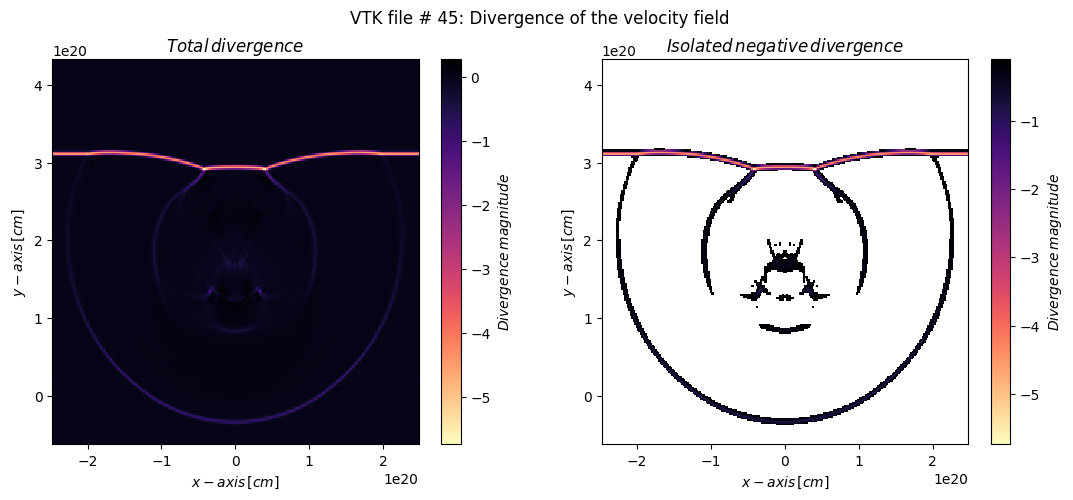

In [16]:
# Call the function
div_velocity, negative_div = divergence(vx1_2d, vx2_2d, True)

We use the data in code units to carry out the calcs because the values in physical units where too big. Additionally, since we are carrying out comparisons, the value of spacing did not seem to affect the result, which is why we chose it to be $1$.

#### - **Method 2:** Read the 2D pressure field. Compute the gradient of the pressure and isolate the cells with large pressure gradients (i.e. where $\frac{|\vec\nabla P|}{P}>0.01\max{\left(\frac{|\vec\nabla P|}{P}\right)}$). Such cells are candidate shocked cells.

In [17]:
# Function
def gradient(prs_2d, boolean1, boolean2):
    """
    Computes the gradient of the pressure and isolate 
    the cells with large pressure gradients.
    Inputs: prs_2d -> thermal pressure field in 2D
            boolean1, boolean2 -> True or False to show the plots
    Outputs: large_grad_x, large_grad_y -> large gradients
    Author: MAY
    """
    # Get the data to code units
    prs_code = prs_2d/press_units

    # And compute the derivatives of the data
    grad_x = np.array(np.gradient(prs_code, axis=1))
    grad_y = np.array(np.gradient(prs_code, axis=0))

    # To isolate the large values, let us define the ratios
    ratio_x = abs(grad_x)/prs_code
    ratio_y = abs(grad_y)/prs_code

    # And get the isolated arrays
    large_grad_x = np.where(ratio_x > 0.001*np.max(ratio_x), abs(grad_x), 0)
    large_grad_y = np.where(ratio_y > 0.001*np.max(ratio_y), abs(grad_y), 0)

    # If required, we plot the gradients first:
    if boolean1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
        fig.suptitle('VTK file # 45: Gradient of the thermal pressure field (absolute value)')
        
        total = ax1.pcolor(x_2d_grid, y_2d_grid, abs(grad_x), cmap="Greens", vmin=0, vmax=80)
        ax1.set_title(r"$Along\,x$")
        ax1.set_xlabel(r"$x-axis\, [cm]$")
        ax1.set_ylabel(r"$y-axis\, [cm]$")
        cb1 = plt.colorbar(total)
        cb1.set_label(r"$Gradient\, magnitude$")
        
        negative = ax2.pcolor(x_2d_grid, y_2d_grid, abs(grad_y), cmap="Greens", vmin=0, vmax=80)
        ax2.set_title(r"$Along\,y$")
        ax2.set_xlabel(r"$x-axis\, [cm]$")
        ax2.set_ylabel(r"$y-axis\, [cm]$")
        cb2 = plt.colorbar(negative)
        cb2.set_label(r"$Gradient\, magnitude$")
        
        plt.show()
        plt.close()

    # And now the large values:
    if boolean2:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
        fig.suptitle('VTK file # 45: Large gradient values of thermal pressure (absolute value)')
        
        total = ax1.pcolor(x_2d_grid, y_2d_grid, large_grad_x, cmap="magma_r", vmin=0, vmax=80)
        ax1.set_title(r"$Along\,x$")
        ax1.set_xlabel(r"$x-axis\, [cm]$")
        ax1.set_ylabel(r"$y-axis\, [cm]$")
        cb1 = plt.colorbar(total)
        cb1.set_label(r"$Gradient\, magnitude$")
        
        negative = ax2.pcolor(x_2d_grid, y_2d_grid, large_grad_y, cmap="magma_r", vmin=0, vmax=80)
        ax2.set_title(r"$Along\,y$")
        ax2.set_xlabel(r"$x-axis\, [cm]$")
        ax2.set_ylabel(r"$y-axis\, [cm]$")
        cb2 = plt.colorbar(negative)
        cb2.set_label(r"$Gradient\, magnitude$")
        
        plt.show()
        plt.close()
        
    return large_grad_x, large_grad_y

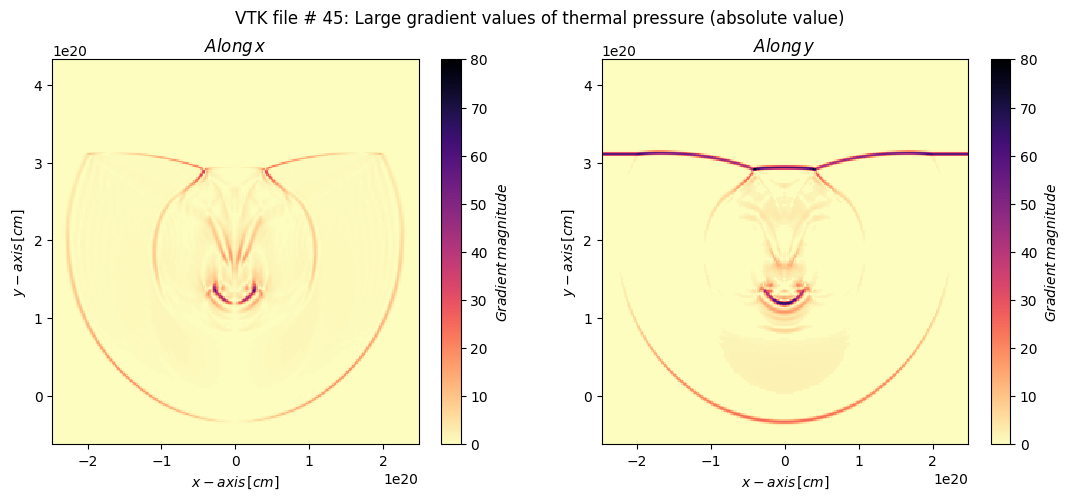

In [18]:
# We call the function
large_gradient_x, large_gradient_y = gradient(prs_2d, False, True)

If we put these last two together, we should have a similar result as that we obtained by using the divergence of the velocity field.

### (d) Make binary maps of the resulting candidate shock cells from both methods. Overall, do you find the same shock candidates on these maps? Label the main shock on these maps.


To have something appropiate to compare it to, we will *add* the gradients of the thermal pressure field along each direction. 

In [19]:
# Function: 
def binary(negative_div_non, large_gradx, large_grady, title, boolean):
    """
    Makes binary maps of the resulting candidate shock cells from both methods.
    Inputs: negative_div_non -> nonbinary negative divergence
            large_gradx, large_grady -> large gradients along each direction
            title -> title to use
            boolean -> True or False to show the plots
    Outputs: fig6 -> figure with the comparison
             total_gradient_bin -> total gradient in binary
             negative_div_bin -> negative divergence in binary
    Author: MAY
    """
    # Getting the negative divergence in binary
    negative_div_bin = np.where(negative_div_non<0, 1, 0)
    
    # Adding the gradients and converting the result to binary:
    total_gradient_non = large_gradx + large_grady
    total_gradient_bin = np.where(total_gradient_non>3.5, 1, 0) # 3.5 because 0 caused too many cells to be 1.

    # And plotting plot if required
    fig6, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5.5))
    fig6.suptitle(title)
    
    neg = ax1.pcolor(x_2d_grid, y_2d_grid, negative_div_bin, cmap="magma_r")#, vmin=0, vmax=80)
    ax1.set_title(r"$Negative\,divergence\,of\,the\,velocity\,field$")
    ax1.set_xlabel(r"$x-axis\, [cm]$")
    ax1.set_ylabel(r"$y-axis\, [cm]$")
    cb1 = plt.colorbar(neg)
    cb1.set_label(r"$Gradient\, magnitude$")
    
    large = ax2.pcolor(x_2d_grid, y_2d_grid, total_gradient_bin, cmap="magma_r")#, vmin=0, vmax=80)
    ax2.set_title(r"$Large\,gradient\,of\,thermal\,pressure\,field$")
    ax2.set_xlabel(r"$x-axis\, [cm]$")
    ax2.set_ylabel(r"$y-axis\, [cm]$")
    cb2 = plt.colorbar(large)
    cb2.set_label(r"$Gradient\, magnitude$")
    if boolean:
        plt.show()
    plt.close()

    return fig6, total_gradient_bin, negative_div_bin

In [20]:
# Set a title
title = 'VTK file #45: Shock candidates comparison (binary format)'

# Call the function
fig6, total_gradient, negative_divergence = binary(negative_div, large_gradient_x,
                                                  large_gradient_y, title, False)

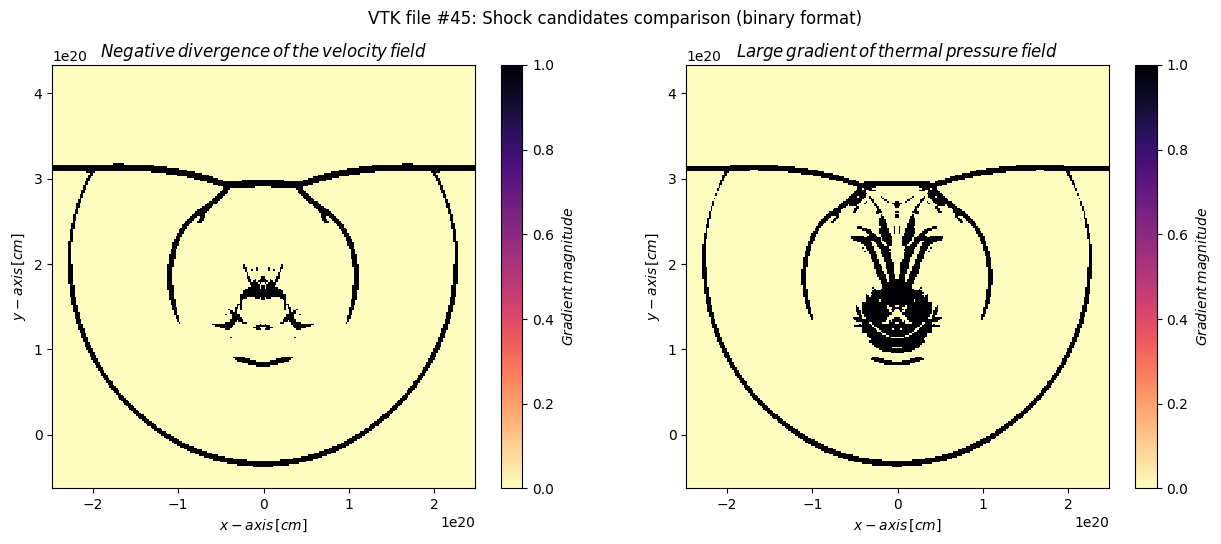

In [21]:
# Let us see
fig6

The shock candidates are, overall, the same. They differ in the shape they have in the center, but that is normal since they do not describe the same physical phenomena. I assume the main shock is the one at the top of the data because it was both the largest negative divergence of the velocity field and of the thermal pressure gradient, but the one that forms the "circle" is a candidate too.

## 3. (5 points) Python loops: full data analysis

Create a set of Python functions that:

### (a) Read the second column of the **vtk.out** file into a time array, normalises these times using the normalisation time computed in problem 1, and then returns a CGS-normalised time array.

In [22]:
# Function
def normalised_time(time_file, t_cgs):
    """
    Normalises the time array from vtk.out.
    """
    # Read the file
    df_time = pd.read_csv(time_file, sep = "\s+", header = None)

    # Get the values we're interested in
    time_array = np.array(df_time.iloc[:,1])

    # And normalise it:
    time = time_array*t_cgs

    return time

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12283/2156640673.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_time = pd.read_csv(time_file, sep = "\s+", header = None)


In [23]:
# Provide the path
time_file = "./data/MHD-shock-cloud/vtk.out"

# And call the function
time_cgs = normalised_time(time_file, time_units)

### (b) Loop over all the simulation VTK files (0 to 60), calls all the functions written for problems 1 and 2, and then prints the resulting maps into two folders called:

1. **"maps"**, which should contain the figures for density, thermal pressure, velocity, and magnetic field for all the times (add a CGS time-stamp to each map).

2. **"features"**, which should contain the figures for cloud density and candidate shocked cells (from both methods) for all the times (add a CGS time-stamp to each map).

**Note:** Fix the min/max values of the colourbars, so that maps at different times can be compared with one another.


My computer took very long when trying to save all three sets (A, B and C) of images at the same time, so I saved one set at a time by commenting the other two. 

In [3]:
def maps_features(folder1, folder2, units_file, time_file, vtks):
    """
    Saves maps of the features and magnitudes detailed above. 
    Inputs: folder1 -> name of the folder for the magnitudes
            folder2 -> name of the folder for the features
            units_file -> file containing the units
            time_file -> time array
            vtks -> string storing all the vtk files
    Outputs: The function itself.
    Author: MAY.
    """
    # 0. Create the folders:
    if os.path.isdir(folder1):
        print("The folder already exists.")
    else:
        os.mkdir(folder1)

    if os.path.isdir(folder2):
        print("The folder already exists.")
    else:
        os.mkdir(folder2)

    for i in range(0, len(time_file)):

        # Units (same for all files):
        d_units, v_units, l_units, t_units, p_units, m_units = units(units_file) 
    
        # Normalised arrays:
        rho_2d, prs_2d, tr1_2d, vx1_2d, vx2_2d, bx1_2d, bx2_2d, mesh = normalised_arrays(vtks.format(i))

        # A. Maps of all the magnitudes
        # 1. The four maps:
        fig1, _, _ = maps(rho_2d, prs_2d, tr1_2d, vx1_2d, vx2_2d,
                          bx1_2d, bx2_2d, mesh, f"State at t = {time_file[i]:.2e} seconds", False)
                                                                                               
        # Save the maps:
        fig1.savefig(os.path.join(folder1, "four_maps{:03d}.png".format(i)))

        # B. Features: Densities
        # 1. Isolate cloud densities:
        fig2, fig3, _ = isolation(rho_2d, tr1_2d, f'Cloud density \n at t = {time_file[i]:.2e} seconds', False, False)

        # Save the maps:
        fig2.savefig(os.path.join(folder2, "densi_map{:03d}.png".format(i)))
        fig3.savefig(os.path.join(folder2, "cloud_map{:03d}.png".format(i)))

        # C. Feature: Comparison between methods
        # 1. Get the negative divergence of velocity:
        _, negative_div = divergence(vx1_2d, vx2_2d, False)

        # 2. The large gradients of thermal pressure:
        large_gradient_x, large_gradient_y = gradient(prs_2d, False, False)

        # 3. And the comparison of both methods in binary format:
        fig4, _, _ = binary(negative_div, large_gradient_x, large_gradient_y,
                           f'Shock candidates comparison at t = {time_file[i]:.2e} seconds (binary)', False)

        # Save the maps:
        fig4.savefig(os.path.join(folder2, "comparison_map{:03d}.png".format(i)))

In [25]:
# Path and names
folder_maps = "./four_maps_yorlan"
folder_features = "./the_features_yorlan"
vtks = "./data/MHD-shock-cloud/data.0{:03d}.vtk"

maps_features(folder_maps, folder_features, units_file, time_cgs, vtks)

### (c) Return a movie showing the time evolution of the magnetic field. What happens to the magnetic field as time progresses?

**Note:** Since there are $256^2$ cells in this simulation, one way to improve the visualisation of 2D vector fields is to interpolate them into a coarser grid.

Since we had all four in one image, we are not just going to show the time evolution of the magnetic field but of all the magnitudes.

In [26]:
# Importing libraries
from PIL import Image
from IPython import display
import glob

In [27]:
def movies(images_input, imgif_output):
    """
    Creates movies for a simulation showing the
    time evolution of maps (PNGs) and attaches to
    them the corresponding value of an array.
    Inputs: images_input -> str containing ALL the maps (***)
            imgif_output -> str with the name of the resulting movie
    No outputs. The function itself.
    Author: MAY.
    Date: 25/04/2024
    """
    # Get the images.
    # Define an empty list:
    images = []

    # The loop.
    for i in sorted(glob.glob(images_input)):

        # Getting the images:
        img = Image.open(i)

        # And append all the new images to the empty list.
        images.append(img)

    # Finally saving them in a gift:
    
    images[0].save(fp = imgif_output, format = "GIF", append_images = images[1:],\
                   save_all = True, duration = 200, loop =0)

In [28]:
# Paths
all_images = "./four_maps_yorlan/four_maps***.png"
gif_images = "./four_maps_yorlan/four_maps.gif"

# Call the function
movies(all_images, gif_images)

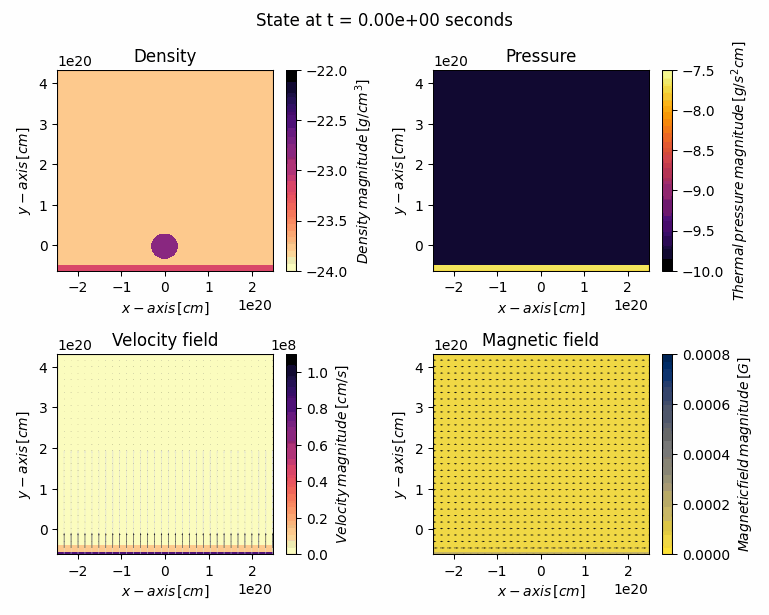

In [29]:
# The result is
display.Image(open(gif_images,'rb').read())

The magnetic field is observed to be uniform except where the cloud is. It seems to curve around it, and follows it like if it was being dragged.

## 4. (5 points) Numerical calculus and time evolution

Create a set of Python functions that:

### (a) Loop over all the simulation VTK files ($0$ to $60$), computes the following quantities for each time:

- the total cloud mass ($m_{cloud}$).
- the cloud mass loss rate ($\dot{m}_{cloud}$)
- position of the centre of mass of the cloud ($r_{cloud}$)
- mass-weighted velocity of cloud ($v_{cloud}$)
- acceleration of the cloud ($\dot{v}_{cloud}$)

and returns a CSV file with $6$ columns, time on the first column, and the above quantities in the next ones.

**Notes:**
- Before coding you should write down the equations needed to compute the above quantities. Some of them involve integrals, others derivatives.

- Use the cloud tracer (tr1) as a weight to get the cloud cells.

- The simulation is 2D. Thus, to obtain the correct units for some of the above integrated quantities, you can safely assume that the differential of the (missing) third component is equal to the other two, i.e. $dz=dx=dy$, so that $dV = dx^3$.

In [30]:
# Function
def compute_quantities(time_file, vtks, mesh1, name_csv):
    """
    Computes the 5 quantities detailed above. 
    Inputs: time_file -> time array
            vtks -> string storting all the vtk files
            mesh1 -> mesh previously defined
            name_csv -> name of the csv file
    Outputs: df -> csv file with all the six columns
             mass_array -> total mass array
             mass_rate_array -> mass loss rate array
             cmx_array -> center of mass in x
             cmy_array -> center of mass in y
             mass_vel_array -> mass-weighed velocity array
             mass_vel_rate_array -> acceleration
    Author: MAY        
    """
    # Define the dx for masses:
    x1 = len_units*np.linspace(mesh1.bounds[0], mesh1.bounds[1], (mesh1.dimensions[0]))
    y1 = len_units*np.linspace(mesh1.bounds[2], mesh1.bounds[3], (mesh1.dimensions[1]))
    dx = abs(x1[10]-x1[11])

    # (for center of masses)
    x_mid = 0.5*(x1[1:] + x1[:-1])
    y_mid = 0.5*(y1[1:] + y1[:-1])

    # for velocities:
    x2 = vel_units*np.linspace(mesh1.bounds[0], mesh1.bounds[1], mesh1.dimensions[0]-1)
    y2 = vel_units*np.linspace(mesh1.bounds[0], mesh1.bounds[1], mesh1.dimensions[0]-1)
    dv = abs(x2[10]-y2[11])
    
    # And for time
    dt = abs(time_file[0]-time_file[1]) 

    # Define the lists to be used:
    mass_list = []
    rate_mass_list = []
    cmx_list = []
    cmy_list = []
    mass_vel_list = []
    
    # Loop:
    for i in range(0, len(time_file)):
        # Vtks:
        rho_2d, _, tr1_2d, _, _, _, _, _ = normalised_arrays(vtks.format(i))
        
        # Call the function for the density mass
        _, _, iso_2d = isolation(rho_2d, tr1_2d, ' ', False, False)

        # 1. Convert to 3D data by stacking them and get the total mass:
        iso_3d = np.stack([iso_2d]*256, axis=2)
        total_mass = np.sum(iso_3d)*dx**3
        mass_list.append(total_mass)

        # 2. The cloud mass rate will be obtained out of the loop.

        # 3. Position of the center of mass:
        cmx = np.sum(np.sum(iso_2d, axis=0)*(x_mid))/np.sum(iso_2d) 
        cmy = np.sum(np.sum(iso_2d, axis=1)*(y_mid))/np.sum(iso_2d) 

        cmx_list.append(cmx)
        cmy_list.append(cmy)

        # 4. Mass-weighted velocity of cloud:
        mass_vel = np.sum(iso_3d)*dv**3
        mass_vel_list.append(mass_vel)

        # 5. Acceleration of the cloud will be gotten outside.
    
    # Getting all the arrays in the correct form:
    
    mass_array = np.reshape(np.array(mass_list), (61,))
    mass_rate_array = np.gradient(mass_array, dt)
    cmx_array = np.array(cmx_list)
    cmy_array = np.array(cmy_list)
    mass_vel_array = np.reshape(np.array(mass_vel_list), (61,))
    mass_vel_rate_array = np.gradient(mass_vel_array, dt)

    # Data frame:
    df = pd.DataFrame({"Time [s]": time_file, "Cloud mass [g]": mass_array, "Cloud mass loss rate [g/s]": mass_rate_array,
                       "Center of mass (x) [cm]": cmx_array, "Center of mass (y) [cm]": cmy_array,
                       "Mass-weighted velocity [g/s^3]": mass_vel_array,
                       "Acceleration of the cloud [g/s^4]": mass_vel_rate_array}, index = None)

    # Save the data frame:
    df.to_csv(f"{name_csv}", sep=',', float_format='{:.4e}'.format, index = False)
       
    return df, mass_array, mass_rate_array, cmx_array, cmy_array, mass_vel_array, mass_vel_rate_array

In [50]:
# Name of the csv
namecsv = "df_cloud.csv"

# Call the function:
df_cloud, masses, rate, cmxx, cmyy, mass_vell, mass_vell_arr = compute_quantities(time_cgs, vtks, mesh, namecsv)

### (b) Make and return figures of each of the above quantities versus time. Does the cloud accelerate?

In [51]:
# Function
def plot_versus_time(df_cloud, n, ylabel):
    """
    Returns figures versus time.
    Inputs: df_cloud -> csv file with the quantities
            n -> number from 1 to 6 for each
            ylabel -> name of the ylabel
    Outputs: Plots of each.
    """
    # Get the df as np.array
    df = np.array(df_cloud)
    
    # Plot:
    plt.figure()
    plt.plot(df[:,0], df[:,n], marker =".", color = "crimson")
    plt.xlabel(r"$Time\,[s]$")
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()
    plt.close()
    

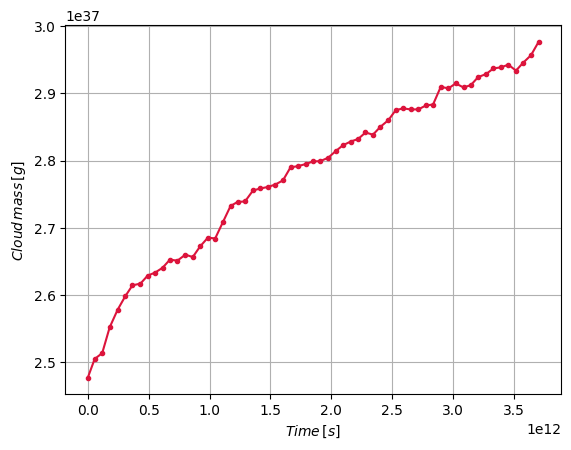

In [39]:
# Call the function:
plot_versus_time(df_cloud, 1, r"$Cloud\,mass\,[g]$")

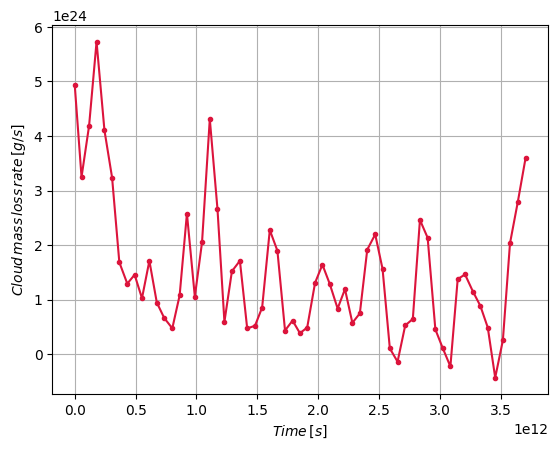

In [40]:
plot_versus_time(df_cloud, 2, r"$Cloud\,mass\,loss\, rate\, [g/s]$")

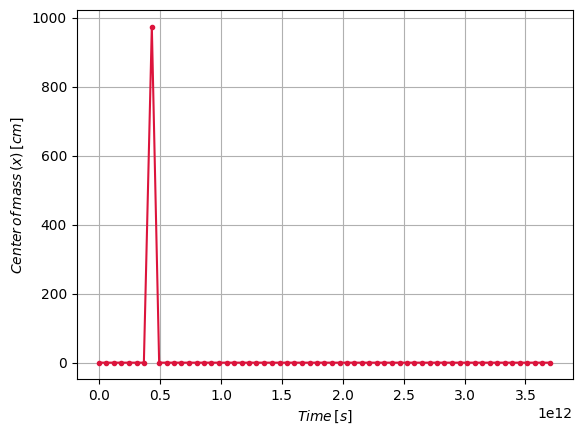

In [41]:
plot_versus_time(df_cloud, 3, r"$Center\, of\, mass\, (x)\, [cm]$")

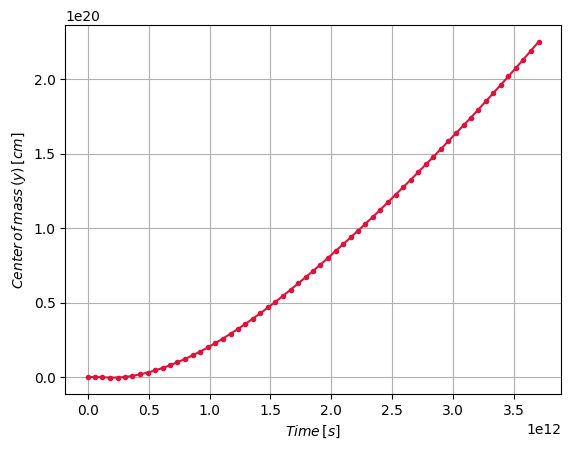

In [42]:
plot_versus_time(df_cloud, 4, r"$Center\, of\, mass\, (y)\, [cm]$")

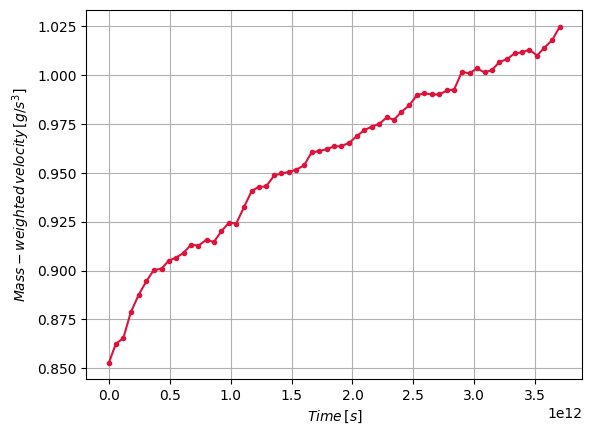

In [43]:
plot_versus_time(df_cloud, 5, r"$Mass-weighted\, velocity\, [g/s^3]$")

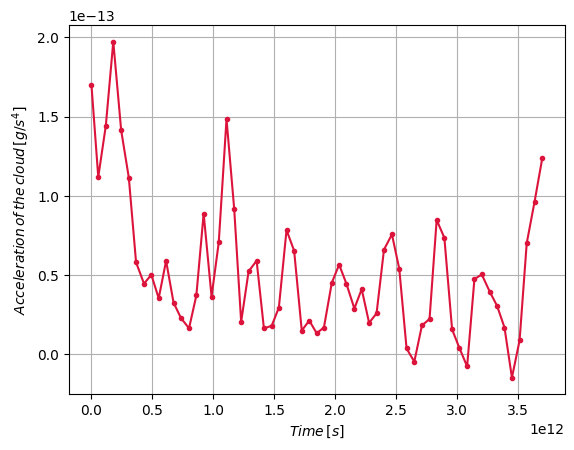

In [44]:
plot_versus_time(df_cloud, 6, r"$Acceleration\, of\, the\, cloud\, [g/s^4]$")

The 5th plot, weighted-mass velocity vs. time, let us confirm that it the cloud accelerates. The velocity changes. 

### (c) Return a movie showing the time evolution of the cloud density map and the position of the centre of mass of the cloud. Use a marker to indicate the time-dependent position on the density maps.

In [1]:
# Function
def cloud_and_cm(cmx, cmy, time_file, mesh, folder3,  boolean1):
    """
    Return a movie showing the time evolution of the cloud density map
    and the position of the centre of mass of the cloud.
    Inputs: cmx -> center of mass in x array
            cmy -> center of mass in y array
            time_file -> time array
            folder3 -> name of the folder to store the images
            images_path -> string storing all the images
            gif_name -> name of the gif
            boolean1 -> True or False to show the images
    Author: MAY
    """
    # Folder for the images:
    if os.path.isdir(folder3):
        print("The folder already exists.")
    else:
        os.mkdir(folder3)
    
    # Grid components:
    x = len_units*np.linspace(mesh.bounds[0], mesh.bounds[1], (mesh.dimensions[0] - 1))
    y = len_units*np.linspace(mesh.bounds[2], mesh.bounds[3], (mesh.dimensions[0] - 1))

    # Grid:
    x_2d, y_2d = np.meshgrid(x, y)

    # Loop:
    for i in range(0, len(time_file)):
        rho_2d, _, _, _, _, _, _, mesh = normalised_arrays(vtks.format(i))
    
        fig4, ax = plt.subplots()
        dens = ax.pcolor(x_2d_grid, y_2d_grid, np.log10(rho_2d), cmap = "magma_r", vmin = -24, vmax = -22)
        ax.scatter(cmx[i], cmy[i], marker = ".", color = "khaki", label = "Center of mass of cloud")
        ax.legend(loc=1)
        fig4.colorbar(dens, label = r"$Density\, magnitude\, [g/cm^3]$")
        ax.set(title = f'Density at {time_file[i]:.2e} seconds', xlabel = r"$x-axis\, [cm]$",
               ylabel = r"$y-axis\, [cm]$")
        if boolean1:
            plt.show()
        plt.close()

        fig4.savefig(os.path.join(folder3, "density_cm_map{:03d}.png".format(i)))

In [53]:
# Paths:
folder3 = "./shock_and_cm"

# Call the function
cloud_and_cm(cmxx, cmyy, time_cgs, mesh, folder3, False)

The folder already exists.


In [54]:
# Paths and names 
all_imag = "./shock_and_cm/density_cm_map***.png"
gif_nombre = "./shock_and_cm/density_cm_map.gif"

# Create the gif
movies(all_imag, gif_nombre)

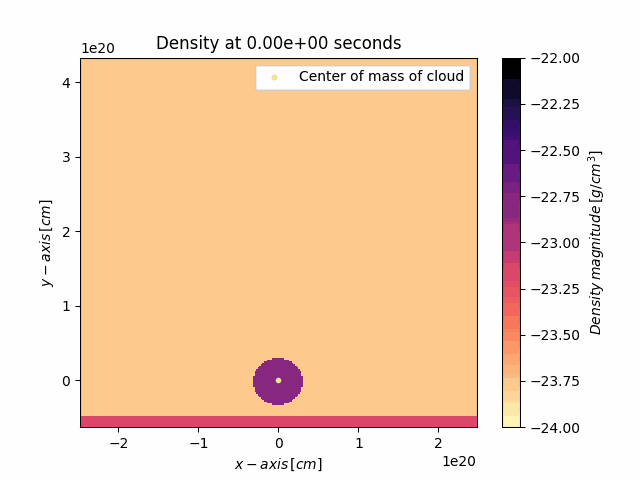

In [55]:
# Display
display.Image(open(gif_nombre,'rb').read())

The result seems to be good as the center of mass is where it should.